<a href="https://colab.research.google.com/github/haroldsantiago/FundamentosRN/blob/main/Clasificacion_de_imagenes_flores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds


In [2]:
# Paso 1: Cargar el conjunto de datos de flores
(ds_train, ds_val), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:60%]', 'train[40%:]'],
    as_supervised=True,
    with_info=True
)

# Verificar el número de clases
num_classes = ds_info.features['label'].num_classes
print(f'Número de clases: {num_classes}')  # Debe ser 5


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.28H57F_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Número de clases: 5


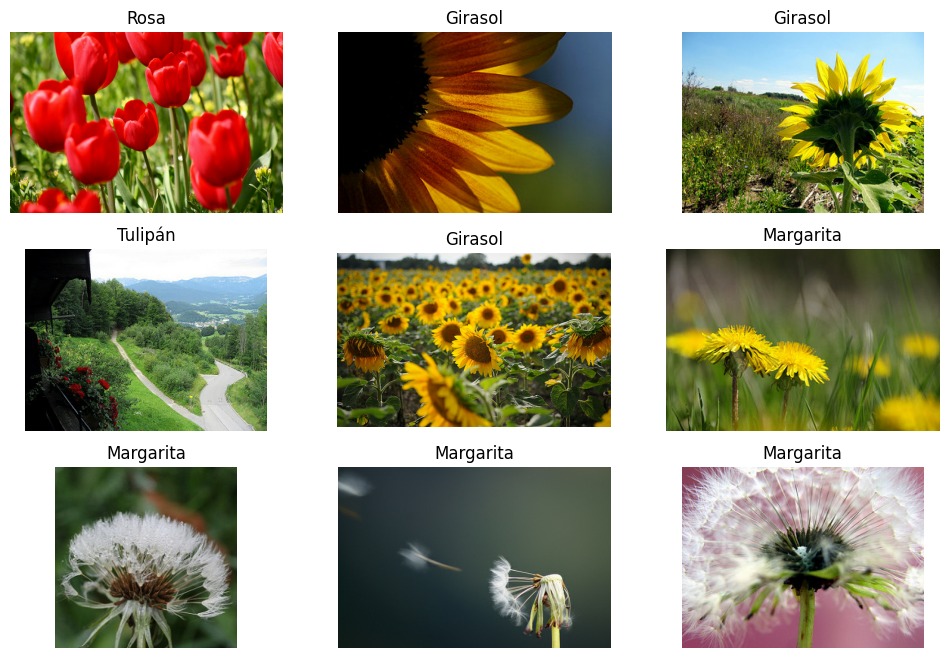

In [3]:
# Paso 1.1: Visualizar algunas imágenes del conjunto de entrenamiento
def display_sample_images(dataset, class_names, num_images=9):
    plt.figure(figsize=(12, 8))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy() / 255.0)  # Normalizar la imagen para mostrar
        plt.title(class_names[label.numpy()])
        plt.axis('off')
    plt.show()

# Obtener los nombres de las clases
class_names = ['Margarita', 'Diente de león', 'Rosa', 'Girasol', 'Tulipán']
# Mostrar imágenes de muestra
display_sample_images(ds_train, class_names)


In [4]:
# Paso 2: Preprocesar el conjunto de datos
IMG_SIZE = 128
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Cambiar el tamaño de la imagen
    image = image / 255.0  # Normalizar a [0, 1]
    return image, label

# Aplicar el preprocesamiento
ds_train = ds_train.map(preprocess).batch(32).cache().prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess).batch(32).cache().prefetch(tf.data.AUTOTUNE)



In [5]:
# Paso 3: Construir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(48, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(24, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(12, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Capa de salida para clasificación múltiple
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Paso 4: Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# Paso 5: Entrenar el modelo
history = model.fit(ds_train, epochs=20, validation_data=ds_val)


Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.4905 - loss: 1.1872 - val_accuracy: 0.5168 - val_loss: 1.1645
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5057 - loss: 1.1427 - val_accuracy: 0.5236 - val_loss: 1.1446
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 69s 980ms/step - accuracy: 0.5324 - loss: 1.1123 - val_accuracy: 0.5322 - val_loss: 1.1240
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5409 - loss: 1.0777 - val_accuracy: 0.5372 - val_loss: 1.1067
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 67s 976ms/step - accuracy: 0.5602 - loss: 1.0450 - val_accuracy: 0.5241 - val_loss: 1.1037
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5675 - loss: 1.0171 - val_accuracy: 0.5277 - val_loss: 1.1075
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 68s 982ms/step - accuracy: 0.5803 - loss: 0.9924 - val_accuracy: 0.5468 - val_loss: 1.0857
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 68s 986ms/step - accuracy: 0.5885 - loss: 0.9591 - val_accuracy: 0.5658

In [9]:
# Paso 6: Evaluar el modelo
loss, accuracy = model.evaluate(ds_val)
print(f'Precisión en el conjunto de validación: {accuracy:.2f}')



69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 238ms/step - accuracy: 0.7093 - loss: 0.8421
Precisión en el conjunto de validación: 0.65


In [10]:
# Paso 7: Visualizar la precisión y la pérdida
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

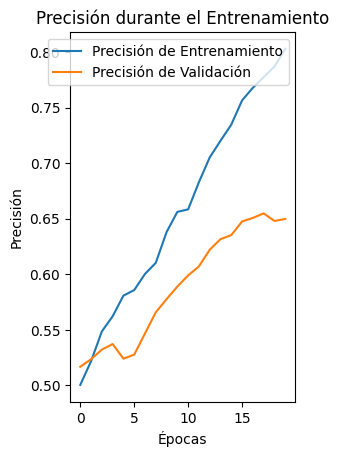

In [11]:
# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()



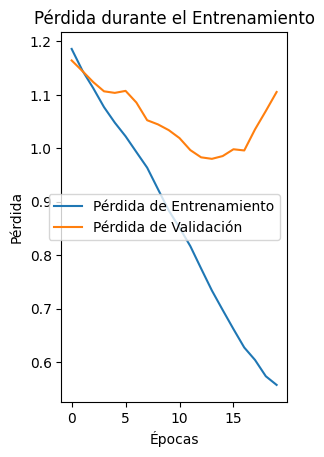

In [12]:
# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


In [13]:
# Paso 8: Inferencia en nuevas imágenes
# Función para preprocesar la imagen
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Cambiar tamaño
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Convertir a array
    img_array = img_array / 255.0  # Normalizar
    return np.expand_dims(img_array, axis=0)  # Añadir dimensión para el batch


In [14]:
# Función para hacer la predicción
def predict_flower(image_path):
    preprocessed_image = preprocess_image(image_path)

    # Realizar la predicción
    prediction = model.predict(preprocessed_image)

    # Obtener la clase con la mayor probabilidad
    class_idx = np.argmax(prediction[0])
    return class_idx, prediction[0][class_idx]


In [15]:
# Ruta de la imagen a predecir
image_path = '/content/flor-girasol.jpg'  # Cambia esto a la ruta de tu imagen
predicted_class_idx, confidence = predict_flower(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [16]:
# Mostrar los resultados
print(f'Predicción: {class_names[predicted_class_idx]} (Confianza: {confidence:.2f})')




Predicción: Girasol (Confianza: 0.55)


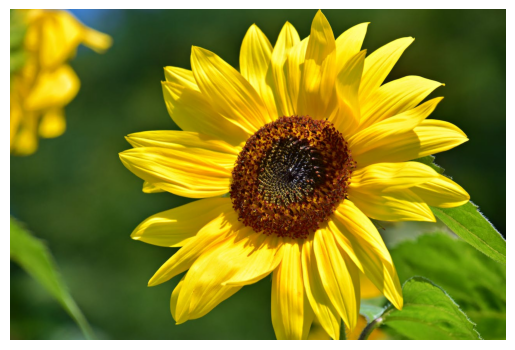

In [17]:
# Visualizar la imagen
img = tf.keras.preprocessing.image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicción: Girasol (Confianza: 0.55)


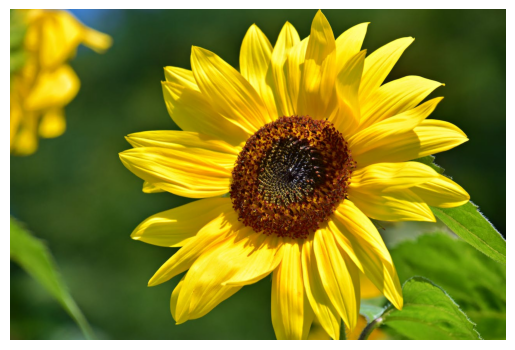

In [18]:
# Definir un umbral para determinar si la imagen no pertenece a las categorías conocidas
CONFIDENCE_THRESHOLD = 0.5

# Función para hacer la predicción con detección de imágenes fuera de categoría
def predict_flower_or_unknown(image_path):

    # Realizar la predicción
    prediction = model.predict(preprocess_image(image_path))

    # Obtener la clase con la mayor probabilidad
    class_idx = np.argmax(prediction[0])
    confidence = prediction[0][class_idx]

    # Comparar con el umbral
    if confidence < CONFIDENCE_THRESHOLD:
        return "Imagen desconocida", confidence
    else:
        return class_names[class_idx], confidence

# Ruta de la imagen a predecir
image_path = '/content/flor-girasol.jpg'  # Cambia esto a la ruta de tu imagen

# Realizar la predicción
predicted_label, confidence = predict_flower_or_unknown(image_path)

# Mostrar los resultados
if predicted_label == "Imagen desconocida":
    print(f"La imagen no corresponde a ninguna categoría conocida (Confianza máxima: {confidence:.2f})")
else:
    print(f'Predicción: {predicted_label} (Confianza: {confidence:.2f})')

# Visualizar la imagen
img = tf.keras.preprocessing.image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()
